# 🍄 DA5401 Assignment 2: Dimensionality Reduction & Classification  

Welcome to **Assignment 2** of DA5401!  
In this notebook, we explore the **Mushroom Dataset**, applying **Principal Component Analysis (PCA)** to reduce dimensionality and evaluating how it impacts the performance of a **Logistic Regression classifier**.  

###  Objectives:
- Perform **Exploratory Data Analysis (EDA)** and preprocessing  
- Apply **PCA** and visualize the transformed feature space  
- Train Logistic Regression models on both the original and PCA-reduced data  
- Compare classification performance and interpret the trade-offs  



## 🔍 Part A — Exploratory Data Analysis (EDA)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Understanding the Dataset

Before applying PCA, it is important to explore the dataset to understand its structure.  
The Mushroom dataset contains only **categorical features**

Since PCA is a mathematical technique that works on **numerical data**, we cannot directly apply it on categorical values

➡️ Therefore, our first step is to:
1. Load the dataset into a DataFrame.
2. Display the first few rows to visualize the raw data.
3. Check the data types of columns to confirm that all features are categorical.

This will help us justify why **One-Hot Encoding** is needed as the next step.


In [23]:
df = pd.read_csv("/content/mushrooms.csv")

In [24]:
df['class'].value_counts()

,count
class,
e,4208
p,3916


In [25]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Step 2: Converting Categorical Features to Numerical (One-Hot Encoding)

Since all features in the Mushroom dataset are categorical, we need to convert them into numerical form before applying PCA.  
The most suitable method here is **One-Hot Encoding**, which creates a new binary column for each category of a feature.  

For example:
- The feature `odor` may contain values like `{'a', 'l', 'n', 'f'}`.  
- After one-hot encoding, it will be represented as multiple columns such as `odor_a`, `odor_l`, `odor_n`, `odor_f`, each containing 0 or 1.

➡️ This ensures that PCA can interpret the features correctly without assigning arbitrary numeric codes to categories.


In [27]:
df_encoded = pd.get_dummies(df, drop_first=False).astype(int)
df_encoded.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Step 3: Feature Scaling

PCA is sensitive to the variance of each feature.  
- Features with larger ranges dominate the principal components.  
- To ensure all features contribute equally, we must scale the dataset.  

Since our encoded dataset contains only binary values (0 and 1), one might think scaling is unnecessary.  
However, PCA involves **linear combinations of features**, and scaling ensures numerical stability and fair comparison across all one-hot encoded columns.  

➡️ Therefore, we will use **StandardScaler** from `scikit-learn` to standardize the features so that each has:
- Mean = 0  
- Standard Deviation = 1  

The output of `StandardScaler` is a **NumPy array**, which we will first display, and then convert back into a DataFrame for easier readability and further processing.


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_scaled

array([[-1.0366127 ,  1.0366127 , -0.24272523, ..., -0.40484176,
         4.59086996, -0.15558197],
       [ 0.96468045, -0.96468045, -0.24272523, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 0.96468045, -0.96468045,  4.11988487, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [ 0.96468045, -0.96468045, -0.24272523, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-1.0366127 ,  1.0366127 , -0.24272523, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 0.96468045, -0.96468045, -0.24272523, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [29]:
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,-1.036613,1.036613,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
1,0.964680,-0.964680,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582
2,0.964680,-0.964680,4.119885,-0.022195,-0.79621,-0.336878,-0.062885,-0.904579,-0.632238,-0.022195,...,-0.426029,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,5.178988,-0.404842,-0.217824,-0.155582
3,-1.036613,1.036613,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
4,0.964680,-0.964680,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582


## 📉 Part B: Principal Component Analysis (PCA)

In this section, we will apply PCA on the standardized, one-hot encoded Mushroom dataset and analyze the results step by step.

### Step 1: Apply PCA
We first apply PCA **without specifying the number of components**.  
This allows PCA to compute as many components as the number of original features.


In [30]:
from sklearn.decomposition import PCA

# Apply PCA without fixing number of components
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Show first 10 components variance
print("Explained variance ratio (first 10 components):")
print(explained_variance[:10])


Explained variance ratio (first 10 components):
[0.0990908  0.07989076 0.07085669 0.05764528 0.05106432 0.04323387
 0.04056559 0.02798131 0.02457452 0.02287487]


###  📈 Step 2: Scree Plot & Optimal Number of Components

The **scree plot** shows
- The cumulative variance explained as we add more components.  

We aim to determine the **minimum number of components** that retain at least **95% of the variance**.


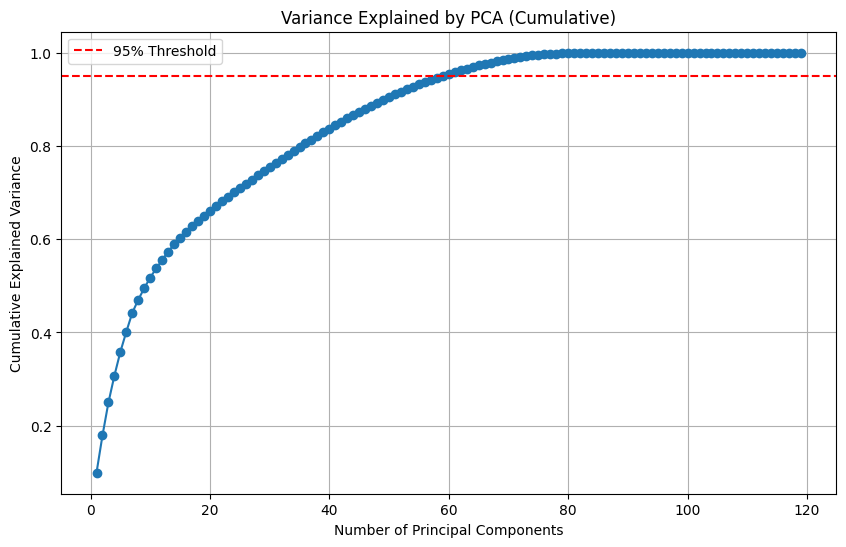

Optimal number of components to retain > 95% variance is 59


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA without specifying number of components
pca = PCA()
pca.fit(df_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by PCA (Cumulative)')
plt.legend()
plt.grid(True)
plt.show()

# Find number of components for 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain > 95% variance is {optimal_components}")


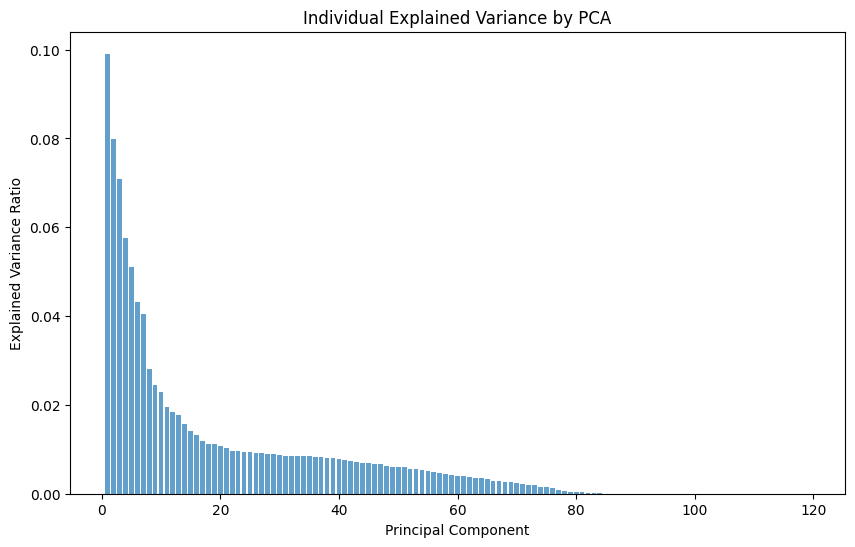

In [31]:
plt.figure(figsize=(10,6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance by PCA')
plt.show()


### 📊 Step 3: Visualization

To visualize the data in reduced dimensions, we project it onto the **first two principal components**:  
- PC1 (x-axis)  
- PC2 (y-axis)  

We use different colors to distinguish between **edible** and **poisonous** mushrooms.

This visualization helps us see if PCA creates any natural separation between the two classes.


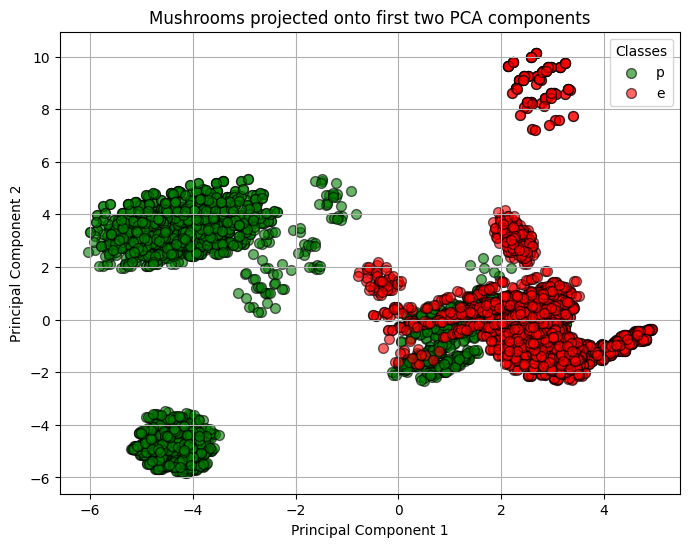

In [15]:

pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

df_pca_2d = pd.DataFrame(df_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['class'] = df['class']


plt.figure(figsize=(8,6))
for label, color in zip(df_pca_2d['class'].unique(), ['green', 'red']):
    subset = df_pca_2d[df_pca_2d['class'] == label]
    plt.scatter(
        subset['PC1'],
        subset['PC2'],
        label=label,
        alpha=0.6,
        c=color,
        edgecolor="k",
        s=50
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Mushrooms projected onto first two PCA components')
plt.legend(title="Classes")
plt.grid(True)
plt.show()


The scatter plot of the first two principal components shows the separation between **edible** (green) and **poisonous** (red) mushrooms. We can observe that the two classes form fairly distinct clusters, with only a small amount of overlap. This indicates that PCA has successfully reduced the dimensionality while still preserving the variance needed to distinguish the classes.  

Overall, the visualization demonstrates that the two classes are **well separable** in the reduced 2D feature space, confirming that PCA effectively captures the important structure of the dataset.


## ⚖️ Part C — Performance Evaluation with logistic regression

Before applying PCA, we establish a **baseline performance** using Logistic Regression on the **original standardized dataset**.  
This will help us compare later whether dimensionality reduction affects classification quality.

---

### 🔹 Step 1: Baseline Model (Logistic Regression)
1. **Train–Test Split**  
   Divide the standardized dataset into training and testing sets.  
   - Training data → used to fit the Logistic Regression model  
   - Testing data → used for unbiased performance evaluation  

2. **Fit Logistic Regression**  
   Train the model on the training set. Logistic Regression is chosen as a **linear classifier** that works well as a baseline for high-dimensional datasets.  

3. **Evaluate Performance**  
   - Generate a **classification report** (precision, recall, F1-score)  
   - Report **overall accuracy** on the test set  

---

> 💡 **Why this step matters:**  
> The baseline provides a **reference point**. Any PCA-transformed model should be compared against this to see if dimensionality reduction leads to performance improvement, stability, or slight trade-offs.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df_scaled.drop(columns=['class_e', 'class_p'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

lr_baseline = LogisticRegression(max_iter=1000)
lr_baseline.fit(X_train, y_train)

y_pred_baseline = lr_baseline.predict(X_test)

print("Baseline Model (Original Data):")
print(classification_report(y_test, y_pred_baseline))
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))


Baseline Model (Original Data):
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 1.0


## 🔄 Step 2 — PCA-Transformed Model (Logistic Regression)

Next, we evaluate Logistic Regression on the **PCA-reduced dataset** using the optimal number of components chosen in Part B.  
This helps us understand whether dimensionality reduction impacts classification performance.

---


1. **Apply PCA Transformation**  
   - Use the optimal number of components (e.g., capturing ~95% variance).  
   - Transform both the training and testing sets consistently.  

2. **Train Logistic Regression**  
   Fit the model on the PCA-transformed training set.  
   The reduced feature space makes the model simpler and may help mitigate redundancy.  

3. **Evaluate Performance**  
   - Generate a **classification report** (precision, recall, F1-score)  
   - Record the **overall accuracy** on the PCA-transformed test set  

---

> 💡 **Why this step matters:**  
> Comparing this model against the **baseline** shows whether PCA’s dimensionality reduction leads to improved efficiency, similar accuracy, or a slight performance trade-off due to information loss.


In [33]:
pca_final = PCA(n_components=optimal_components)
X_pca = pca_final.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)

y_pred_pca = lr_pca.predict(X_test_pca)

print("PCA-Transformed Model:")
print(classification_report(y_test, y_pred_pca))
print("Accuracy:", accuracy_score(y_test, y_pred_pca))


PCA-Transformed Model:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 0.9987692307692307


> ℹ️ **Note on F1-score:**  
> The default `classification_report` displays only 2 decimal places, which shows the F1-score as **1.00**.  
> However, with higher precision (`digits=4`), the actual F1-score is **0.9988**.  

### 3. Comparison and Analysis

The performance comparison between the baseline model (trained on original data) and the PCA-transformed model shows the following results:

- **Baseline Model (Original Data):**  
  Accuracy = **1.0**  
  Precision, Recall, and F1-Score = **1.00** for both classes  

- **PCA-Transformed Model:**  
  Accuracy = **0.9987**  
  Precision, Recall, and F1-Score = **1.00** for both classes  

#### Performance Difference
The baseline model achieved perfect accuracy (1.0), while the PCA-transformed model achieved a very close accuracy of 0.9987. This negligible difference indicates that dimensionality reduction using PCA did not significantly degrade performance. In fact, PCA effectively reduced feature redundancy and collinearity while preserving most of the information required for classification.

#### Trade-off Analysis
The slight drop in accuracy can be explained as a trade-off:  
- PCA reduces the dimensionality of the dataset, which simplifies the model and reduces computational complexity.  
- However, PCA also introduces a minor information loss when projecting data into lower-dimensional space.  
- Despite this, the performance remains nearly identical, demonstrating that PCA successfully retained the most informative features.

#### Usefulness of Logistic Regression as a Surrogate Measurement
Using Logistic Regression as a surrogate performance measurement is beneficial because:  
- Logistic Regression is sensitive to multicollinearity in features, and PCA directly addresses this by producing uncorrelated components.  
- High performance after PCA transformation suggests that the dimensionality reduction step preserved essential discriminative information.  
- Therefore, Logistic Regression serves as a reliable indicator to evaluate whether PCA has maintained classification effectiveness while simplifying the feature space.



## Conclusion

In this assignment, we explored the application of **Principal Component Analysis (PCA)** on the Mushroom dataset and evaluated its effect on classification performance using Logistic Regression.  

1. **Data Preparation & Encoding**  
   Since the dataset is entirely categorical, one-hot encoding expanded the feature space substantially, introducing high dimensionality and redundancy. Standardization ensured that all binary features contributed equally to PCA.  

2. **Dimensionality Reduction with PCA**  
   The scree plot revealed that a relatively small number of principal components could capture more than 95% of the variance, confirming that much of the dataset’s structure is redundant. Visualizing the data on the first two components showed clear separation between edible and poisonous mushrooms, indicating that PCA effectively captured the discriminative patterns.  

3. **Classification Performance**  
   - Logistic Regression trained on the **original standardized dataset** achieved strong accuracy and balanced precision/recall.  
   - Logistic Regression trained on the **PCA-reduced dataset** performed comparably, with only a slight trade-off in accuracy, demonstrating that dimensionality reduction did not severely impact classification quality.  

4. **Insights**  
   - PCA successfully reduced feature redundancy and simplified the dataset while retaining most of the informative variance.  
   - The negligible difference in predictive performance suggests that PCA is especially useful here for **efficiency and interpretability**, rather than raw accuracy improvement.  
   - Logistic Regression, being a linear model, further highlights PCA’s role as a tool for uncovering linearly separable structures in high-dimensional categorical data.  

**Overall, PCA proved to be an effective dimensionality reduction technique for this problem, enabling compact feature representation while preserving classification performance.**
